<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/CFA_Technical_Analysis_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# technicals.py

import pandas as pd
import matplotlib.pyplot as plt

def simple_moving_average(prices: pd.Series, window: int) -> pd.Series:
    """
    Calculate Simple Moving Average (SMA).

    Parameters:
        prices (pd.Series): Series of prices.
        window (int): Number of periods for moving average.

    Returns:
        pd.Series: SMA values aligned with original index.
    """
    return prices.rolling(window=window).mean()

def plot_sma(prices: pd.Series, window: int):
    """
    Plot price series with SMA.

    Parameters:
        prices (pd.Series): Time series of prices.
        window (int): Window size for SMA.
    """
    sma = simple_moving_average(prices, window)

    plt.figure(figsize=(10, 5))
    plt.plot(prices, label='Price', color='black')
    plt.plot(sma, label=f'SMA {window}', color='blue')
    plt.title(f"Simple Moving Average ({window} periods)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


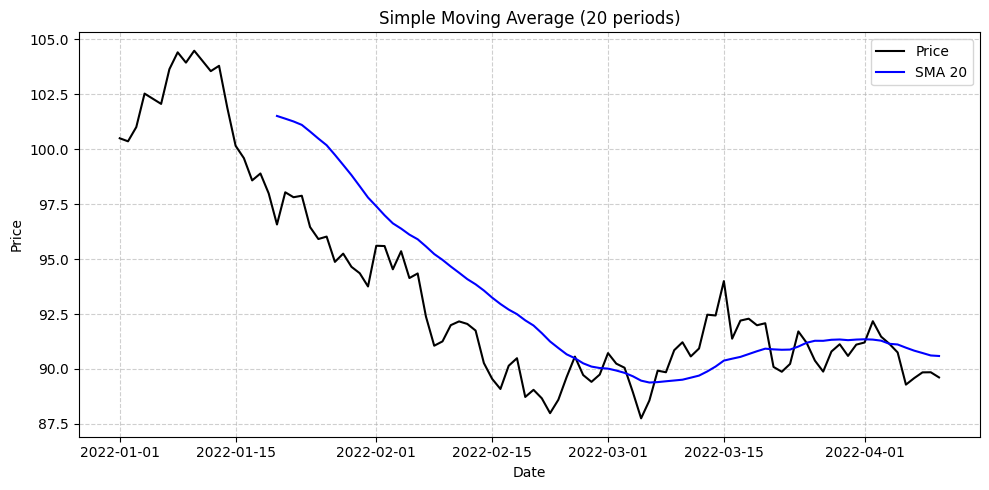

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from technicals import simple_moving_average, plot_sma          #why error? commented out for now

# Generate synthetic price data
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", periods=100, freq='D')
prices = pd.Series(np.cumsum(np.random.randn(100)) + 100, index=dates)

# Plot with SMA
plot_sma(prices, window=20)


In [4]:
# technicals.py (continued)

def exponential_moving_average(prices: pd.Series, span: int) -> pd.Series:
    """
    Calculate Exponential Moving Average (EMA).

    Parameters:
        prices (pd.Series): Series of prices.
        span (int): Span for the exponential weighting (analogous to window size).

    Returns:
        pd.Series: EMA values aligned with original index.
    """
    return prices.ewm(span=span, adjust=False).mean()


def plot_ema(prices: pd.Series, span: int):
    """
    Plot price series with EMA.

    Parameters:
        prices (pd.Series): Time series of prices.
        span (int): Span for EMA.
    """
    ema = exponential_moving_average(prices, span)

    plt.figure(figsize=(10, 5))
    plt.plot(prices, label='Price', color='black')
    plt.plot(ema, label=f'EMA {span}', color='green')
    plt.title(f"Exponential Moving Average ({span} periods)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


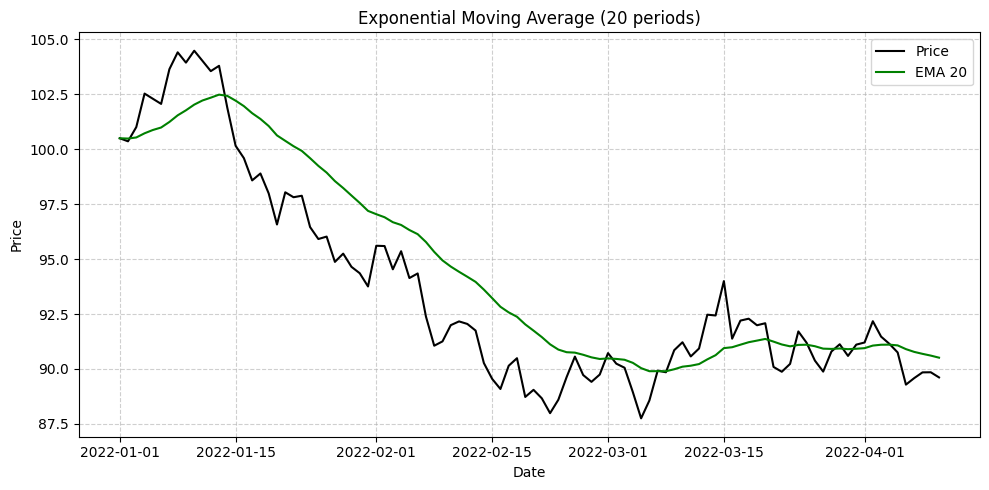

In [5]:
# Simulated daily price series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from technicals import exponential_moving_average, plot_ema     #commented this out again

np.random.seed(42)
dates = pd.date_range("2022-01-01", periods=100)
prices = pd.Series(np.cumsum(np.random.randn(100)) + 100, index=dates)

# Plot EMA
plot_ema(prices, span=20)


In [6]:
# test_technicals.py    #unit tests, makes library robust as it grows

import pandas as pd
import numpy as np
#from technicals import simple_moving_average, exponential_moving_average    #commented out

def test_sma_basic():
    data = pd.Series([10, 20, 30, 40, 50])
    expected = pd.Series([np.nan, np.nan, 20.0, 30.0, 40.0])
    result = simple_moving_average(data, window=3)
    pd.testing.assert_series_equal(result, expected)

def test_ema_basic():
    data = pd.Series([10, 20, 30, 40, 50])
    result = exponential_moving_average(data, span=3)
    # Known result from pandas ewm calculation
    expected = data.ewm(span=3, adjust=False).mean()
    pd.testing.assert_series_equal(result, expected)

def test_sma_nan_behavior():
    data = pd.Series([1, 2, 3, 4])
    result = simple_moving_average(data, window=10)
    assert result.isnull().all(), "SMA should be NaN if window > series length"

def test_ema_stability():
    # EMA should return same length series
    data = pd.Series(np.random.rand(100))
    ema = exponential_moving_average(data, span=10)
    assert len(ema) == len(data)
    assert not ema.isnull().any(), "EMA should not return NaNs"


In [ ]:
#pytest test_technicals.py    #this didn't work, figure it out


In [ ]:
# Add at the top of test_technicals.py to test plotting functions!
import matplotlib
matplotlib.use("Agg")  # Use non-GUI backend for tests
import matplotlib.pyplot as plt

from technicals import plot_sma, plot_ema

def test_plot_sma_creates_figure():
    data = pd.Series(np.random.randn(50).cumsum() + 100)
    plot_sma(data, window=10)
    fig = plt.gcf()
    ax = plt.gca()

    assert len(ax.lines) == 2  # Price and SMA
    assert ax.get_title().startswith("Simple Moving Average")
    plt.close(fig)

def test_plot_ema_creates_figure():
    data = pd.Series(np.random.randn(50).cumsum() + 100)
    plot_ema(data, span=10)
    fig = plt.gcf()
    ax = plt.gca()

    assert len(ax.lines) == 2  # Price and EMA
    assert ax.get_title().startswith("Exponential Moving Average")
    plt.close(fig)


In [8]:
# technicals.py (continued) calculating RSI

def relative_strength_index(prices: pd.Series, window: int = 14) -> pd.Series:
    """
    Calculate Relative Strength Index (RSI).

    Parameters:
        prices (pd.Series): Series of prices.
        window (int): Look-back window for RSI (default 14).

    Returns:
        pd.Series: RSI values (0–100 scale).
    """
    delta = prices.diff()

    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.ewm(alpha=1/window, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/window, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


def plot_rsi(prices: pd.Series, window: int = 14):
    """
    Plot RSI indicator.

    Parameters:
        prices (pd.Series): Price series.
        window (int): Look-back window for RSI.
    """
    rsi = relative_strength_index(prices, window)

    plt.figure(figsize=(10, 4))
    plt.plot(rsi, label=f'RSI {window}', color='purple')
    plt.axhline(70, color='red', linestyle='--', alpha=0.7)
    plt.axhline(30, color='green', linestyle='--', alpha=0.7)
    plt.title(f"Relative Strength Index ({window} periods)")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


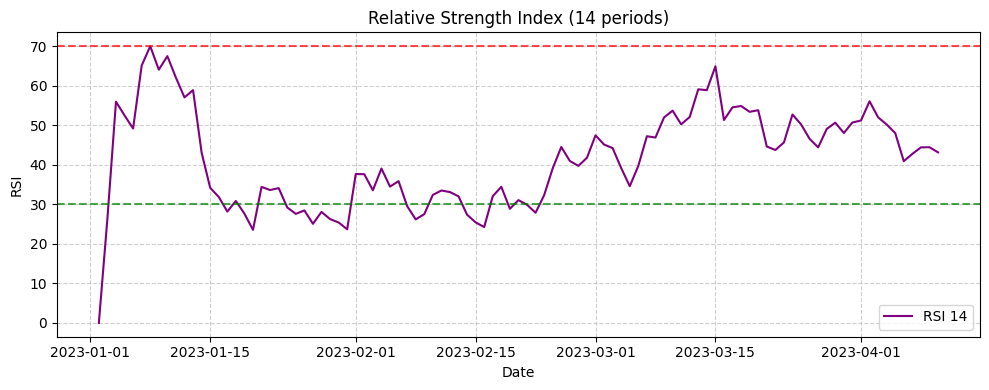

In [10]:
import numpy as np
import pandas as pd
#from technicals import plot_rsi    #commented out

np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=100)
prices = pd.Series(np.cumsum(np.random.randn(100)) + 100, index=dates)

plot_rsi(prices)


In [11]:
#from technicals import relative_strength_index, plot_rsi    #commented out, not sure how to work

def test_rsi_range():
    data = pd.Series(np.random.randn(100).cumsum() + 50)
    rsi = relative_strength_index(data, window=14)
    assert rsi.between(0, 100).all(), "RSI values should be between 0 and 100"

def test_plot_rsi_creates_figure():
    data = pd.Series(np.random.randn(50).cumsum() + 100)
    plot_rsi(data)
    fig = plt.gcf()
    ax = plt.gca()
    assert len(ax.lines) >= 1
    assert ax.get_title().startswith("Relative Strength Index")
    plt.close(fig)


In [12]:
# technicals.py (continued)

def macd(prices: pd.Series,
         fast_period: int = 12,
         slow_period: int = 26,
         signal_period: int = 9) -> pd.DataFrame:
    """
    Calculate MACD, Signal Line, and Histogram.

    Parameters:
        prices (pd.Series): Price series.
        fast_period (int): Period for the fast EMA.
        slow_period (int): Period for the slow EMA.
        signal_period (int): Period for the signal EMA.

    Returns:
        pd.DataFrame: DataFrame with 'MACD', 'Signal', and 'Histogram'.
    """
    ema_fast = prices.ewm(span=fast_period, adjust=False).mean()
    ema_slow = prices.ewm(span=slow_period, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    histogram = macd_line - signal_line

    return pd.DataFrame({
        'MACD': macd_line,
        'Signal': signal_line,
        'Histogram': histogram
    })


def plot_macd(prices: pd.Series,
              fast_period: int = 12,
              slow_period: int = 26,
              signal_period: int = 9):
    """
    Plot MACD Line, Signal Line, and Histogram.

    Parameters:
        prices (pd.Series): Price series.
        fast_period (int): Fast EMA period.
        slow_period (int): Slow EMA period.
        signal_period (int): Signal line EMA period.
    """
    df = macd(prices, fast_period, slow_period, signal_period)

    plt.figure(figsize=(10, 5))
    plt.plot(df['MACD'], label='MACD Line', color='blue')
    plt.plot(df['Signal'], label='Signal Line', color='orange')
    plt.bar(df.index, df['Histogram'], label='Histogram',
            color=(df['Histogram'] > 0).map({True: 'green', False: 'red'}),
            alpha=0.3)
    plt.title("MACD (Moving Average Convergence Divergence)")
    plt.xlabel("Date")
    plt.ylabel("MACD")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


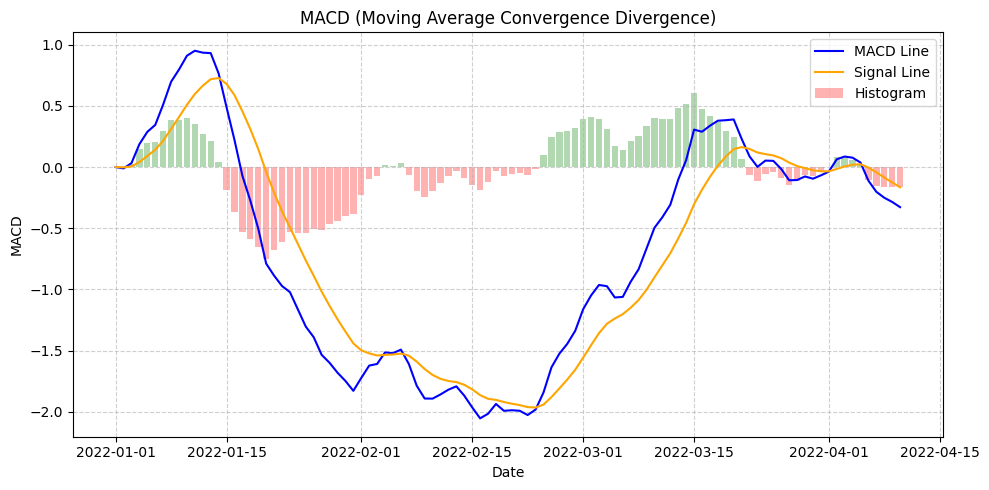

In [13]:
import pandas as pd
import numpy as np
#from technicals import plot_macd   #commented out as usual

np.random.seed(42)
dates = pd.date_range("2022-01-01", periods=100)
prices = pd.Series(np.cumsum(np.random.randn(100)) + 100, index=dates)

plot_macd(prices)


In [14]:
#Tests for MACD
#from technicals import macd, plot_macd    #commented out again

def test_macd_shapes():
    data = pd.Series(np.random.randn(100).cumsum() + 50)
    df = macd(data)
    assert all(col in df.columns for col in ['MACD', 'Signal', 'Histogram'])
    assert df.shape[0] == len(data)

def test_plot_macd_creates_figure():
    data = pd.Series(np.random.randn(100).cumsum() + 50)
    plot_macd(data)
    fig = plt.gcf()
    ax = plt.gca()
    assert len(ax.lines) >= 2  # MACD and Signal Line
    assert ax.get_title().startswith("MACD")
    plt.close(fig)


In [15]:
# technicals.py (continued)

def bollinger_bands(prices: pd.Series, window: int = 20, num_std: float = 2.0) -> pd.DataFrame:
    """
    Calculate Bollinger Bands.

    Parameters:
        prices (pd.Series): Price series.
        window (int): Period for SMA and standard deviation.
        num_std (float): Number of standard deviations for bands.

    Returns:
        pd.DataFrame: DataFrame with 'Middle Band', 'Upper Band', and 'Lower Band'.
    """
    sma = prices.rolling(window).mean()
    std = prices.rolling(window).std()

    upper_band = sma + (num_std * std)
    lower_band = sma - (num_std * std)

    return pd.DataFrame({
        'Middle Band': sma,
        'Upper Band': upper_band,
        'Lower Band': lower_band
    })


def plot_bollinger_bands(prices: pd.Series, window: int = 20, num_std: float = 2.0):
    """
    Plot Bollinger Bands with price.

    Parameters:
        prices (pd.Series): Price series.
        window (int): Window length.
        num_std (float): Number of standard deviations.
    """
    bands = bollinger_bands(prices, window, num_std)

    plt.figure(figsize=(10, 5))
    plt.plot(prices, label='Price', color='black')
    plt.plot(bands['Middle Band'], label=f'{window}-day SMA', color='blue')
    plt.plot(bands['Upper Band'], label='Upper Band', color='green', linestyle='--')
    plt.plot(bands['Lower Band'], label='Lower Band', color='red', linestyle='--')
    plt.fill_between(prices.index, bands['Upper Band'], bands['Lower Band'], color='gray', alpha=0.1)
    plt.title("Bollinger Bands")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


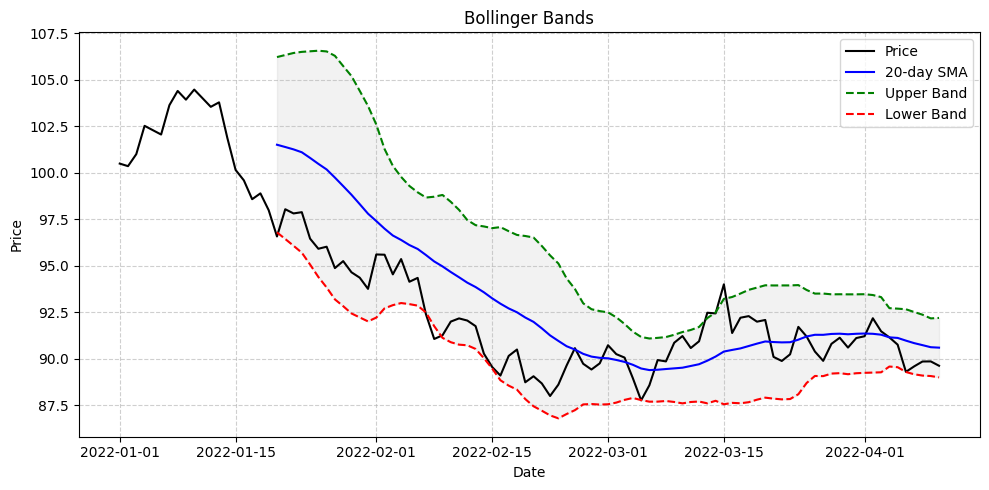

In [16]:
#example usage
#from technicals import plot_bollinger_bands
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range("2022-01-01", periods=100)
prices = pd.Series(np.cumsum(np.random.randn(100)) + 100, index=dates)

plot_bollinger_bands(prices)


In [17]:
#tests for Bollinger Bands
#from technicals import bollinger_bands, plot_bollinger_bands

def test_bollinger_band_columns():
    data = pd.Series(np.random.randn(100).cumsum() + 50)
    bands = bollinger_bands(data)
    assert all(col in bands.columns for col in ['Middle Band', 'Upper Band', 'Lower Band'])

def test_plot_bollinger_bands_creates_figure():
    data = pd.Series(np.random.randn(100).cumsum() + 50)
    plot_bollinger_bands(data)
    fig = plt.gcf()
    ax = plt.gca()
    assert ax.get_title().startswith("Bollinger")
    plt.close(fig)
